Support Vector Machines - COMPSCI 762 - Asif Cheena (615115260)

In [2]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold

DS1

In [3]:
# Functions for DS1 Tasks (Used for DS2/3)

# Task 1
# Create a non-linearly separable dataset (varying C value impactful on non-linearly separable data)
def GenerateNonLinearlySeparableDatasetDS1(n):
    X, y = make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                            flip_y=0.1, class_sep=0.8, random_state=42)
    return X,y

def DS1(X,y):
    X_df = pd.DataFrame(data = X, columns = ['X1', 'X2'])
    y_df = pd.DataFrame(data = y, columns = ['y'])
    DS1 = pd.concat([X_df, y_df], axis = 1)
    DS1.to_csv('DS1.csv', index = False)
    

# Task 2
# Fit a linear SVM with fixed C value
def FitLinearSVM(C, X, y):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    return svm

# Plot DS1 with the decision boundary
def PlotDecisionBoundaries(C, X, y, svm, plot_title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    plt.title(plot_title)
    plt.show()

# Task 3
def LeaveOneOutCV(C, X, y, svm):
    loo = LeaveOneOut()
    train_accuracy = []
    test_accuracy = []

    for train_index, test_index in loo.split(X):
        
        #Iteratively include n-1 in training set and not include a single sample
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Retraining on n-1 samples
        svm.fit(X_train, y_train)
        
        #Prediciting the single sample 
        train_pred = svm.predict(X_train)
        test_pred = svm.predict(X_test)
        
        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))
        
    # Calculate average train and test performance
    train_performance = np.mean(train_accuracy)
    test_performance = np.mean(test_accuracy)

    print('SVM Performance Metrics using LOO Cross Validation with C={}'.format(C))
    print("Accuracy on Training Set: {:.2f}%".format(train_performance * 100))
    print("Accuracy on Testing Set: {:.2f}%".format(test_performance * 100))

    return train_performance, test_performance

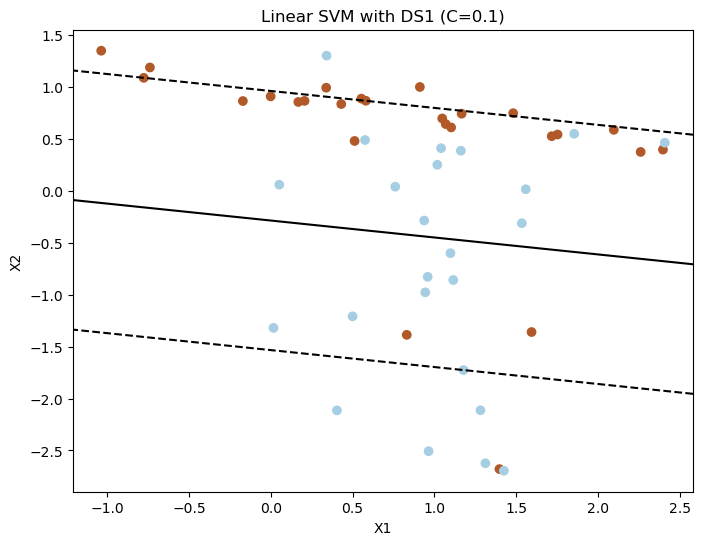

SVM Performance Metrics using LOO Cross Validation with C=0.1
Accuracy on Training Set: 69.96%
Accuracy on Testing Set: 70.00%


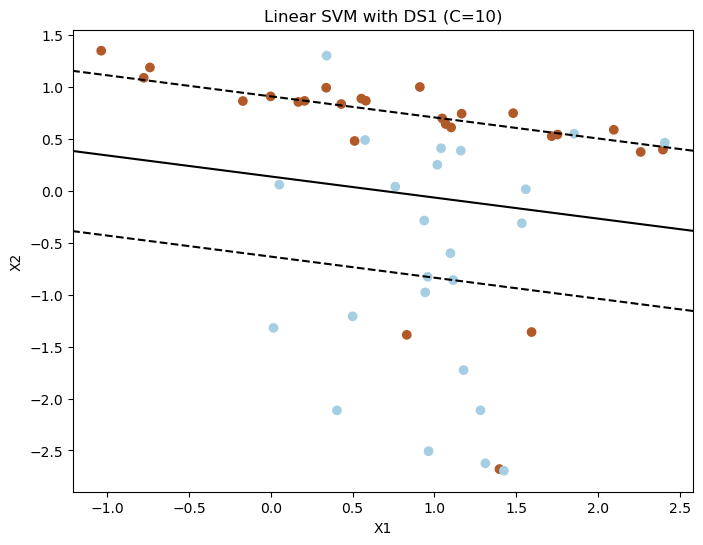

SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 75.96%
Accuracy on Testing Set: 76.00%


In [4]:
# Function Calls for DS1 Tasks

# Task 1 - Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference. 
X,y = GenerateNonLinearlySeparableDatasetDS1(n = 50)
DS1(X,y)

# Task 2 - Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.
C = 0.1
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS1 (C={})'.format(C))

# Task 3 - Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

# Task 4 - Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.
C = 10
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS1 (C={})'.format(C))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

Task 5 - Explain what C does and how it improved the SVM in this case

The C term is a hyper-parameter in SVM models that controls the misclassification tolerance rate by adjusting the margin. An optimal C value for a given problem would best balance the trade-off between maximizing the margin, allowing for more misclassified instances (increasing generalizability), and minimizing the training error. A smaller value of C allows for a wider margin and more misclassified instances, in contrast while a larger value of C leads to a narrower margin and fewer misclassified instances. Hence increasing the C value assigns a greater importance to minimizing the training error over model generalizability (lower tolerance to misclassified instances), resulting in a narrower margin and this is reflected in the plots above. 

When increasing the C value of the linear SVM trained on the DS1 dataset, the training accuracy increases as visually the margin is narrower and there are less misclassified instances, however in theory we would expect there to be a trade-off with accuracy on unseen data as this also increases with C in this case. However, this would not be the case with every dataset and it may be that C=0.1 was underfitting to the data and just suboptimal in comparison to C=10 hence narrower the margin helped overcome the model underfitting, and not being able to capture patterns/trends in the data, hence potentially justifying the increase in test accuracy.

---------------------------------------------------------------
SVM Performance Metrics using LOO Cross Validation with C=0.1

Accuracy on Training Set: 69.96%

Accuracy on Testing Set: 70.00%

---------------------------------------------------------------

---------------------------------------------------------------
SVM Performance Metrics using LOO Cross Validation with C=10

Accuracy on Training Set: 75.96%

Accuracy on Testing Set: 76.00%

---------------------------------------------------------------

DS2

In [5]:
# Addtional Functions for DS2 Tasks

# Task 1
def ExploratoryAnalysis(DS2):
    plt.figure(figsize=(8, 6))
    plt.scatter(DS2[0], DS2[1])
    plt.scatter(DS2[0], DS2[1], c=DS2[2], cmap=plt.cm.Paired)
    plt.show()


# Task 2
def RBFSVM(gamma, X, y, C):
    svm = SVC(kernel='rbf', C=C, gamma=gamma)
    svm.fit(X, y)
    return svm

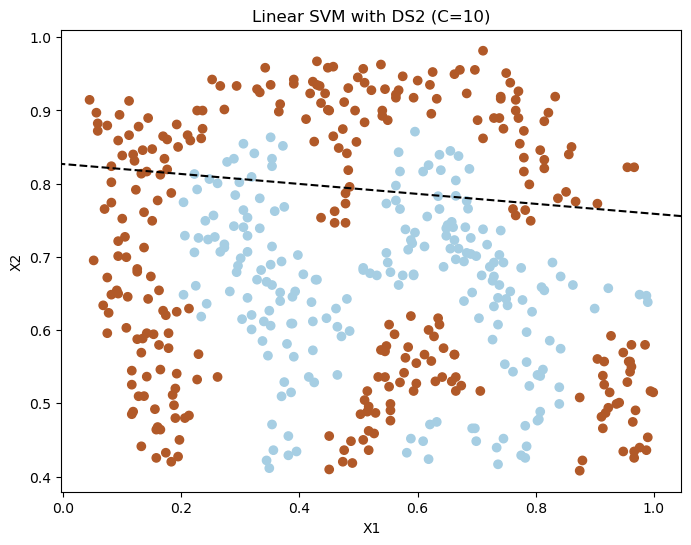

Linear Kernel
SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 57.40%
Accuracy on Testing Set: 57.40%


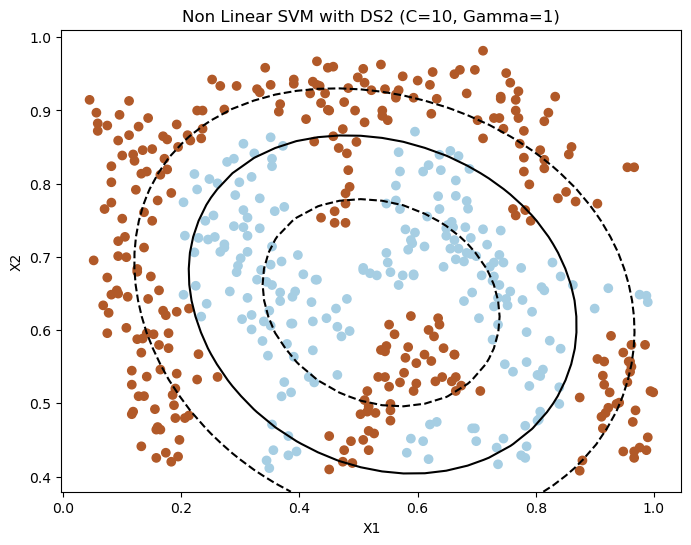

Non-Linear Kernel (Radial Based Function)
SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 80.34%
Accuracy on Testing Set: 79.60%


In [6]:
# Function Calls for DS2 Tasks

# Task 1 - Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.
# Restructuring DS2 as model input
DS2 = pd.read_csv('D2.csv', header = None)
X, y = [0, 1], DS2[2]
X = DS2[X].values

C = 10
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS2 (C={})'.format(C))
print('Linear Kernel')
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

# Task 2 - Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.
C, gamma = 10, 1
svm = RBFSVM(gamma, X, y, C)
PlotDecisionBoundaries(C, X, y, svm, plot_title = ('Non Linear SVM with DS2 (C={}, Gamma={})'.format(C, gamma)))
print('Non-Linear Kernel (Radial Based Function)')
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

DS2 Task 3 - Explain which kernel you chose and why?

Firstly, to evaluate the performance metrics with SVMs fit to DS2 I continued using Leave-One-Out Cross Validation (LOOCV) despite the increase in dataset size. This is because LOOCV provides a strong unbiased estimate of test performance, and the trade-off with computational expense was not significant enough to change to an alternative evaluation method such as 5 or 10 fold Cross Validation. There were also no extreme outliers so LOOCV was perfectly suitable.

The data from inspection can be seen as non-linearly separable so fitting a linear SVM is highly suboptimal in this case and this is reflected in the performance metrics of the linear SVM and the fact that the plot does not contain the decision boundary as it not apparent in the original feature space. To better handle DS2 I used a non-linear kernel function, Radial Based Function (RBF). I did this as it utilizes the kernel trick and it essentially maps the data into a higher dimensional feature space where it possibly becomes linearly separable. This allows the SVM to capture non-linear relationships between the data points and achieve better classification performance.  

---------------------------------------------------------------
Linear Kernel

SVM Performance Metrics using LOO Cross Validation with C=10

Accuracy on Training Set: 57.40%

Accuracy on Testing Set: 57.40%

---------------------------------------------------------------

---------------------------------------------------------------

Non-Linear Kernel (Radial Based Function)

SVM Performance Metrics using LOO Cross Validation with C=10, Gamma=1

Accuracy on Training Set: 80.34%

Accuracy on Testing Set: 79.60%

---------------------------------------------------------------

DS3

In [7]:
# Addtional Function for DS3 Tasks

# Task 2
def KFoldCV(X, y, param_grid, k, kernel):
    svm = SVC(kernel = kernel)

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    grid_search = GridSearchCV(svm, param_grid, cv=kf)
    grid_search.fit(X, y)

    # Print the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Accuracy on Testing Set using K-Fold CV: {:.2f}%".format(grid_search.best_score_ * 100))

    return grid_search.best_params_

def FitSVM(X, y, kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X, y)
    return svm

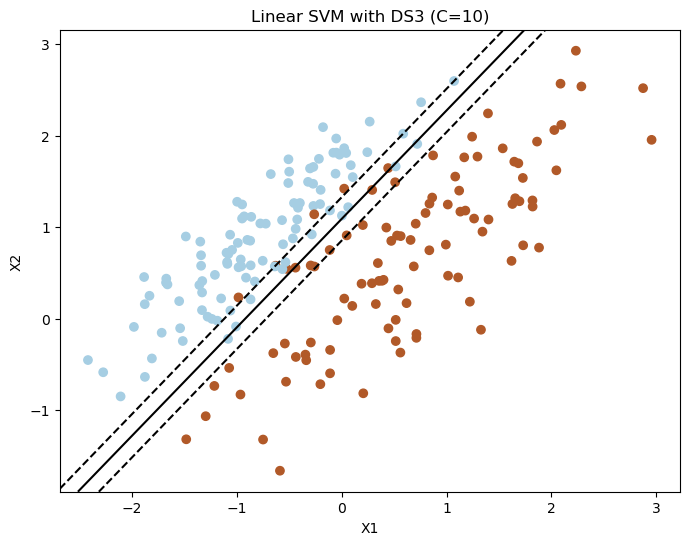

SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 95.50%
Accuracy on Testing Set: 94.50%


Best Hyperparameters:  {'C': 10, 'gamma': 1}
Accuracy on Testing Set using K-Fold CV: 95.00%


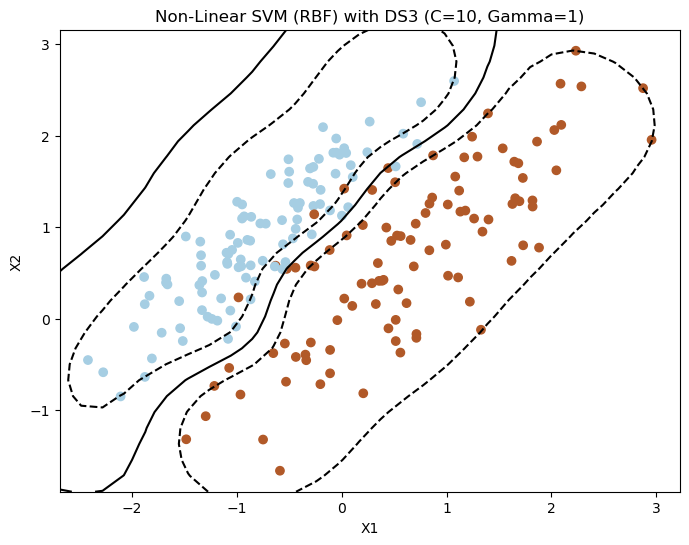

SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 97.03%
Accuracy on Testing Set: 97.00%


In [8]:
# Function Calls for DS3 Tasks

# Task 1 - Repeat step 1.2 and 1.3 from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.
# Restructuring DS2 as model input
DS3 = pd.read_csv('D3.csv', header = None)
X, y = [0, 1], DS3[2]
X = DS3[X].values

C = 10
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS3 (C={})'.format(C))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)
print('\n')

# Task 2 - Pick a kernel and 2 hyperparameters to optimize, optimize the hyperparameters (similar to Assignment 1), plot again data set and decision boundary and give the performance.
# Optimising the following hyperparameters of SVM Models: C, Kernel
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]}
k, kernel = 5, 'rbf'

BestParameters = KFoldCV(X, y, param_grid, k, kernel)
svm = FitSVM(X, y, 'rbf', BestParameters['C'], BestParameters['gamma'])
PlotDecisionBoundaries(C, X, y, svm, plot_title = ('Non-Linear SVM (RBF) with DS3 (C={}, Gamma={})'.format(BestParameters['C'], BestParameters['gamma'])))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

DS3 Task 3 - Explain the results of the previous step

DS3 from visual inspection appears to be linearly separable in nature, and this is reflected in the significantly good performance metrics of the linear SVM with a C value of unknown optimality. However, it was out of interest that I fit a non linear (RBF) SVM to DS3 despite in reality it not being necessary or beneficial in this given case. Non-linear SVMs and RBFs in specific have a gamma parameter (hyper-parameter) and it controls the influence of each individual training instance on the decision boundary. A smaller gamma value correlates to a softer/smoother decision boundary with a larger radius, while a larger gamma value correlates to a more irregular/complex decision boundary and smaller radius. The C parameter is a generalised hyperparameter to all SVM models and as stated before it controls the trade-off between minimising the margin and minimising training error. Both hyper-parameters were optimised using K-Fold CV (k=5), and have optimal values of C = 10 and Gamma = 1.


The RBF non linear SVM outperforms the linear SVM despite both performing extremely well on the given dataset. The performance gap is slight and it is clear that the non-linear is more overfit to this given dataset hence the higher training accuracy. The data is also just very separated naturally and visually the non-linear model has less misclassified instances due to more complex decision boundaries and so it makes sense that the test accuracy (unbiased estimate) also is higher than that of the linear SVM. Overall, a linear SVM in this situation is more appropriate as there are no complex non linear relationships needing to be capture as the data is linearly separable in the original feature space and so there is no requirement for the additional computational expense and in other circumstances of linearly separable data the RBF model may overfit and perform worse when it comes to predicting new instances.


---------------------------------------------------------------
Linear Kernel

SVM Performance Metrics using LOO Cross Validation with C=10

Accuracy on Training Set: 95.50%

Accuracy on Testing Set: 94.50%

---------------------------------------------------------------

---------------------------------------------------------------

Non-Linear Kernel (Radial Based Function)

Best Hyperparameters:  {'C': 10, 'gamma': 1}

SVM Performance Metrics using LOO Cross Validation with C=10, Gamma=1

Accuracy on Training Set: 97.03%

Accuracy on Testing Set: 97.00%

---------------------------------------------------------------

